In [22]:
from matplotlib import pyplot
import numpy as np
import math

def Mon (q,n):
        return q**n
def RealF (ct,pt,mt):
    qs=0
    for i in range (mt+1):
        qs=qs+Mon(pt,i)*ct[i]
    return qs

def houseHolder2(m):    
    l = len(m)
   # print (l)
    for i in range(0, l - 1):
        I = np.eye(l - i)
        ai = m[:, i] 
        abs1 = np.linalg.norm(ai[i:l]) 
        sign = np.sign(m[i, i])
        vi = np.array([ai[i:l]]).T + sign * abs1 * np.array([I[:, 0]]).T
        Qi = I - 2 * (vi @ vi.T) / (vi.T @ vi)
        J = np.eye(l)
        J[i:l, i:l] = Qi
        m = J@m
    return m 
    
N=3
x=[]
y=[]
xxx=[]
yyy=[]
toch=[]
toch1=[]
toc=[]
toc1=[]
c=[]
F=[]
fx=[]
with open('experiment_2.txt') as Data:
    for line in Data:
        a, b = line.split()
        x.append(float(a))
        y.append(float(b))
M=len(x)
toch=np.zeros(20)
toch1=np.zeros(20)
toc=np.zeros(5)
toc1=np.zeros(5)
xxx=np.zeros(1076)
yyy=np.zeros(1076)
A=np.zeros((M,N+1))
AT=np.zeros((N+1,M))
B=np.zeros((N+1,N+1))# B*x = AT*A*x = AT*y = F
F=np.zeros((N+1,1))
I=np.zeros((N+1,N+1))
w=0
for i in range (N+1):
    I[i,i]=1 
for i in range(M):
    if (i % 269 == 0):
        toch[w]=x[i]
        toch1[w]=y[i]
        w=w+1
    for j in range (N+1):
        A[i,j]=Mon(x[i],j)
        AT[j,i]=Mon(x[i],j)
            
B=AT@A
F=AT@y
print(np.linalg.cond(A))
print(np.linalg.cond(B))
#print(toch)
#print(M)


6833.885181794172
46701986.67791794


In [23]:
#B,F

(array([[5.38000000e+03, 5.45806630e+02, 7.33271844e+01, 1.10698545e+01],
        [5.45806630e+02, 7.33271844e+01, 1.10698545e+01, 1.78222883e+00],
        [7.33271844e+01, 1.10698545e+01, 1.78222883e+00, 2.98881947e-01],
        [1.10698545e+01, 1.78222883e+00, 2.98881947e-01, 5.15546681e-02]]),
 array([1838413.069519  ,  244230.33252478,   36610.00320109,
           5865.87250888]))

In [24]:
#Хаусхолдер
l=N+1
for i in range(N):
    I = np.eye(l - i)
    ai = B[:, i] 
    abs1 = np.linalg.norm(ai[i:l]) 
    vi = np.array([ai[i:l]]).T + abs1 * np.array([I[:, 0]]).T
    Qi = I - 2 * (vi @ vi.T) / (vi.T @ vi)
    J = np.eye(l)
    J[i:l, i:l] = Qi
    B= J@B
    F=J@F

for i in range (N+1):
    c.append(0)
    for j in range (N+1):
        if abs(B[i,j])- 0.000000000000000001 <0:
            B[i,j]=0
#B

array([[-5.40812392e+03, -5.50522442e+02, -7.40878450e+01,
        -1.11963145e+01],
       [-1.62223065e-14, -1.82349281e+01, -3.69757599e+00,
        -6.72547192e-01],
       [ 6.96087675e-16, -4.77956823e-16, -4.97570000e-02,
        -1.50901618e-02],
       [-9.94158440e-16, -1.34963909e-16,  1.11762285e-18,
         1.21679794e-04]])

In [25]:
#Обратный ход Гаусса (correct)
c[N]=F[N]/B[N,N]
for i in range (N-1,-1,-1):
    c[i]=F[i]
    for j in range (i,N):
        c[i]=c[i]-B[i,j+1]*c[j+1]
    c[i]=c[i]/B[i,i]    
c

[-1.4183319264736283,
 3716.5508436373016,
 -2525.9371747788573,
 248.01263032092467]

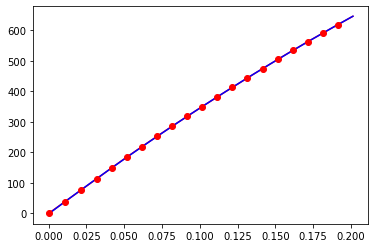

In [26]:
#График
fx.clear()
for i in range(M):
    fx.append(RealF(c,x[i],N))
pyplot.plot(x, y, 'r') # plotting t, a separately 
pyplot.plot(x, fx, 'b') # plotting t, b separately 
pyplot.plot(toch, toch1, 'ro')

#w=0
#for i in range(200):
    #xxx[i]=x[i]
    #yyy[i]=y[i]
    #if (i+1 % 50 == 0):
        #toc[w]=x[i]
        #toc1[w]=fx[i]
        #w=w+1    
#pyplot.plot(xxx, yyy, 'g')
#pyplot.plot(toc, toc1, 'ro')
#pyplot.show()


In [27]:
# Норма SME (correct)
z=0
for i in range (M):
    z=z+abs(y[i]-fx[i])**2
z=math.sqrt(z/M)/max(y)
z

0.0006693545669428071

In [28]:
def Hol(n):
    yy=np.zeros(n+1)
    b=np.zeros(M)
    bm=np.zeros(n+1)
    for i in range(M):
        b[i]=y[i]

    C=np.zeros((n+1,M))
    C=A.T
    U=np.zeros((n+1,n+1))
    U=C@A
    co=0
    bm=C@b#//меняем вектор b
#r=cond(U)//Число обусловленности AtA
    R=np.zeros((n+1,n+1))
    R=np.linalg.cholesky(U)#//находим верхнетреугольную матрицу из разложения Холесского
    bm=np.linalg.inv(R)@bm#////меняем вектор b
#print(bm.size)
    yy[n]=bm[n]/R.T[n,n]#//Обратный ход метода Гаусса

    yy[n]=bm[n]/R.T[n,n]
    for i in range (n-1,-1,-1):
        yy[i]=bm[i]
        for j in range (i,n):
            yy[i]=yy[i]-R.T[i,j+1]*yy[j+1]
        yy[i]=yy[i]/R.T[i,i]

    fx.clear()
    for i in range(M):
        fx.append(RealF(yy,x[i],n))
    z=0
    for i in range (M):
        z=z+abs(y[i]-fx[i])**2
    z=math.sqrt(z/M)/max(y)

    print(z)
    pyplot.plot(x, y, 'r') # plotting t, a separately
    pyplot.plot(x, fx, 'b') # plotting t, b separately
    pyplot.show()



0.0006693545669428089


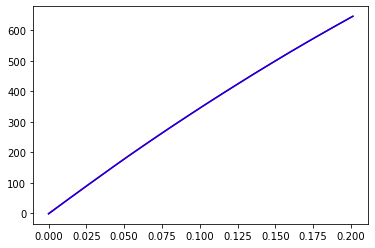

In [29]:
Hol(3)
